## First Load in the Data Set from Kaggle

In [2]:
# if dataset folder doesn't exist, download the dataset from kaggle
import os
import zipfile
if not os.path.exists("dataset"):
    %pip install kaggle
    # also need to get kaggle api key and put it in ~/.kaggle/kaggle.json
    !kaggle datasets download -d jehanbhathena/weather-dataset

    with zipfile.ZipFile("weather-dataset.zip", 'r') as zip_ref:
        zip_ref.extractall()

Note: you may need to restart the kernel to use updated packages.
100%|████████████████████████████████████████| 587M/587M [00:29<00:00, 28.3MB/s]
100%|████████████████████████████████████████| 587M/587M [00:29<00:00, 20.7MB/s]


## Load in Images

lightning 377


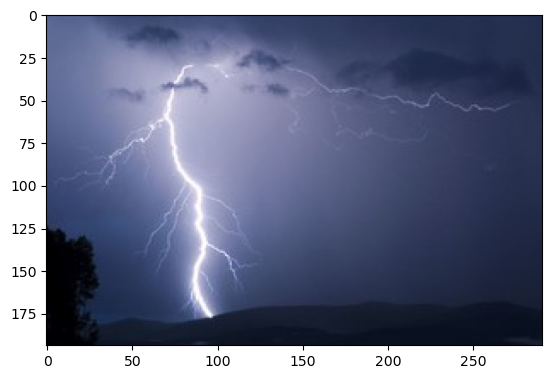

sandstorm 692


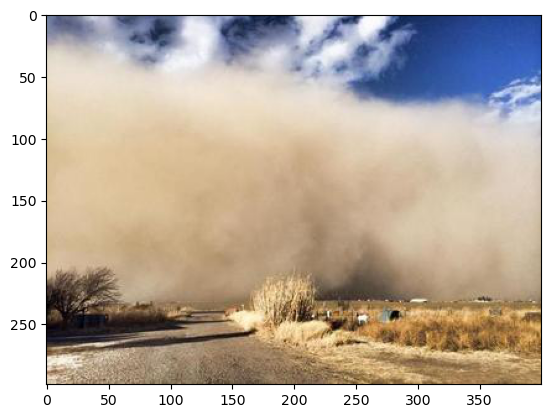

glaze 639


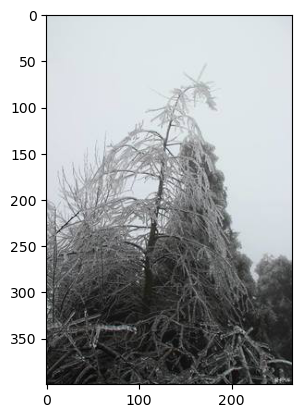

rain 526


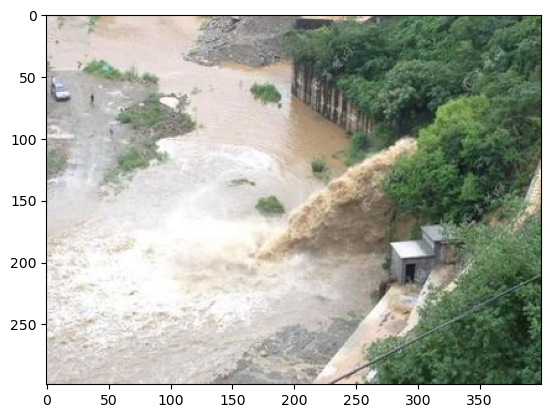

rime 1160


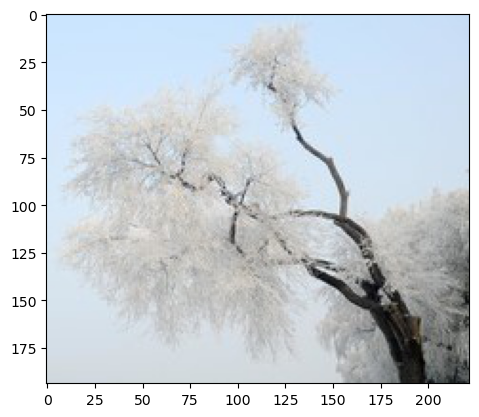

frost 475


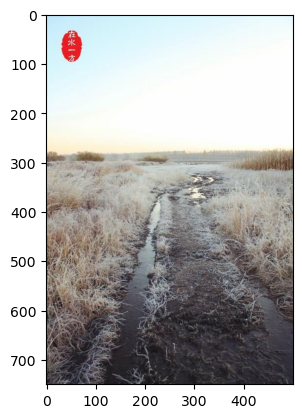

fogsmog 851


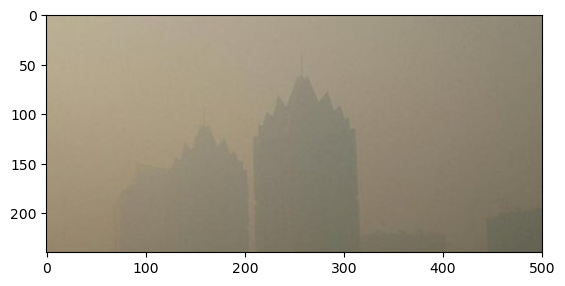

hail 591


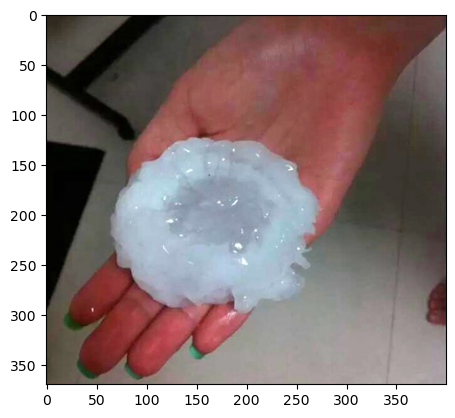

dew 698


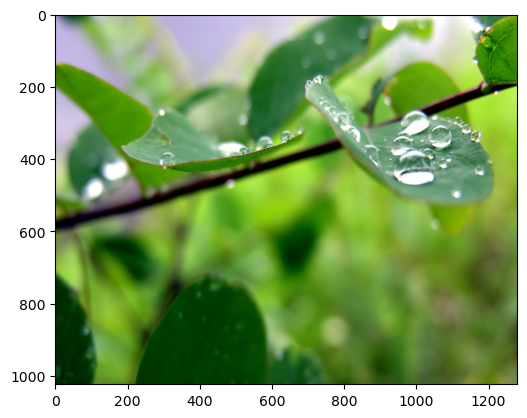

rainbow 232


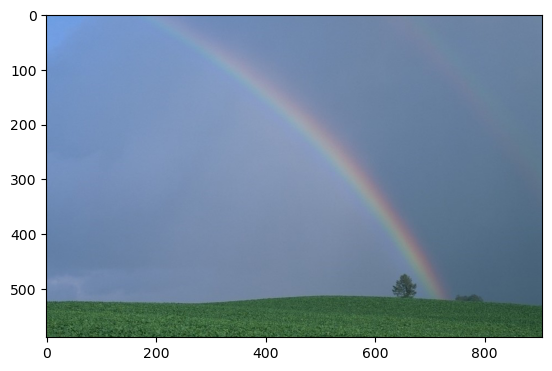

snow 621


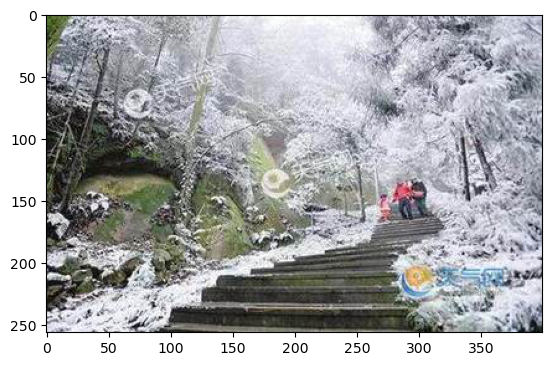

In [3]:
# for each folder in dataset, display the number of files in it and show the first image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

for folder in os.listdir("dataset"):
    print(folder, len(os.listdir("dataset/"+folder)))
    img = mpimg.imread("dataset/"+folder+"/"+random.choice(os.listdir("dataset/"+folder)))
    imgplot = plt.imshow(img)
    plt.show()


## Create CSV with image paths as features and their weather as label

In [4]:
import csv

# Set the path to your dataset directory
dataset_directory = 'dataset'

# Specify the CSV file name
csv_file_name = 'images_labeled.csv'

# Open the CSV file for writing
with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(['filepath', 'label'])
    
    # Walk through the dataset directory
    for root, dirs, files in os.walk(dataset_directory):
        for file in files:
            # Check if the file is an image (e.g., .jpg, .png)
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Extract the label from the folder name
                label = os.path.basename(root)
                # Construct the file path
                file_path = os.path.join(root, file)
                # Write the file path and label to the CSV
                writer.writerow([file_path, label])

print(f'CSV file {csv_file_name} has been created successfully.')

CSV file images_labeled.csv has been created successfully.


## Create train, test, val folders

In [5]:
# Divide the data into training, test, and validation sets
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from the CSV file
data = pd.read_csv(csv_file_name)

# Split the data into 70% training, 15% validation, and 15% test sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=0)
valid_data, test_data = train_test_split(test_data, test_size=0.5, random_state=0)

# Save the data to new CSV
split_data_file_name = 'images_labeled_split.csv'
train_data.to_csv('train_'+split_data_file_name, index=False)
valid_data.to_csv('valid_'+split_data_file_name, index=False)
test_data.to_csv('test_'+split_data_file_name, index=False)